# Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
%matplotlib inline

# Подгружаем данные

In [2]:
file = open(r'D:\рабочая\python\Ilia\Ed\REASKILLS\train\housing.csv', 'r')
housing_prices = open(r'D:\рабочая\python\Ilia\Ed\REASKILLS\train\housing_edited.csv', 'w+')
for i in file.readlines():
    i = i.split()
    i[-1] = ''.join([i[-1], '\n'])
    housing_prices.write(','.join(i))
file.close()
housing_prices.close()
data = pd.read_csv(r'D:\рабочая\python\Ilia\Ed\REASKILLS\train\housing_edited.csv', sep = ',', names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', "RM", 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#Приведем все параметры к типу float64

In [3]:
for column in data.columns:
    if data[column].dtype != 'float64':
        data[column] = data[column].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Выделяем выбросы по целевому признаку

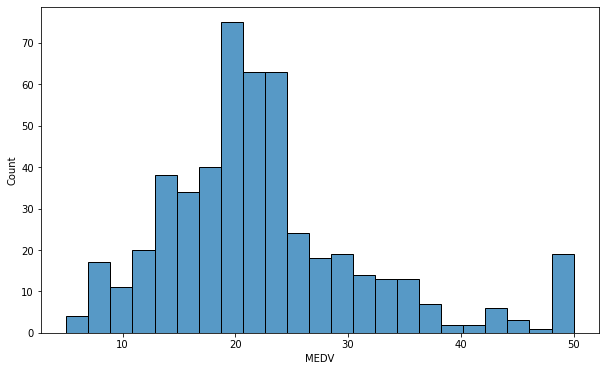

In [4]:
plt.figure(figsize = (10, 6))
sns.histplot(data['MEDV'])
plt.show()           

Убираем все строки где MEDV = 50, т.к. эти значения несут мало информации для модели

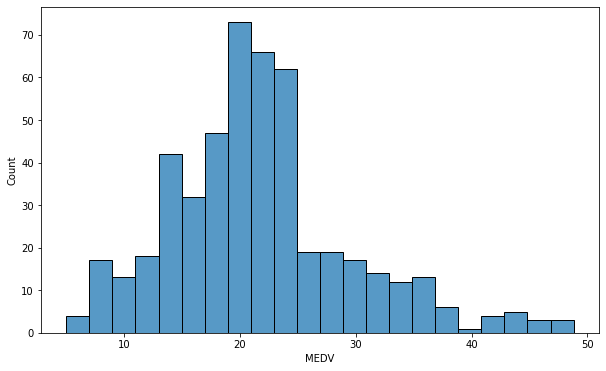

In [5]:
data = data[data['MEDV'] != 50]
plt.figure(figsize = (10, 6))
sns.histplot(data['MEDV'])
plt.show() 

# Разделяем данные на тренировочную и валидационную части

In [6]:
y = data.loc[:, 'MEDV']
x = data.iloc[:, :-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24)

# Строим модель, оцениваем значимость признаков

In [7]:
r2_max = 0
for n_estimators in [5, 7, 9, 12, 15, 20, 25]:
    for max_depth in [6, 7, 8, 10, 12, 15]:
        for min_samples in [2, 8, 12]:
            
            model = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples, random_state = 24, n_jobs = -1)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            r2 = r2_score(y_test, y_pred)
            if r2 > r2_max:
                feature_importances = pd.DataFrame(model.feature_importances_, index = x.columns, columns = ['importance']).sort_values('importance', ascending = False)
                feature_importances['acc_imp'] = feature_importances.cumsum(axis = 0)
                print(feature_importances)
                stop = 0
                for i in feature_importances['acc_imp']:
                    stop += 1
                    if i > 0.99:
                        break      
                best_features = feature_importances.index[:stop].values
                print('Important features are:', best_features)
                r2_max = r2
                print(f'for n={n_estimators}, md={max_depth}, ms={min_samples} r2 =', r2_score(y_test, y_pred))

         importance   acc_imp
RM         0.616759  0.616759
LSTAT      0.227272  0.844031
CRIM       0.049992  0.894023
PTRATIO    0.039411  0.933434
DIS        0.015045  0.948479
TAX        0.014786  0.963265
NOX        0.014257  0.977522
AGE        0.011105  0.988627
B          0.007052  0.995679
INDUS      0.003226  0.998905
ZN         0.000816  0.999721
RAD        0.000279  1.000000
CHAS       0.000000  1.000000
Important features are: ['RM' 'LSTAT' 'CRIM' 'PTRATIO' 'DIS' 'TAX' 'NOX' 'AGE' 'B']
for n=5, md=6, ms=2 r2 = 0.7353773067426619
         importance   acc_imp
RM         0.610326  0.610326
LSTAT      0.218024  0.828351
CRIM       0.052546  0.880897
PTRATIO    0.032947  0.913844
TAX        0.016128  0.929972
INDUS      0.015587  0.945559
DIS        0.015015  0.960574
NOX        0.013378  0.973953
B          0.012187  0.986140
AGE        0.010936  0.997076
ZN         0.002087  0.999163
CHAS       0.000547  0.999710
RAD        0.000290  1.000000
Important features are: ['RM' 'L

# Убираем малозначимые признаки

In [8]:
x_adapt = x.loc[:, best_features]
x_train, x_test, y_train, y_test = train_test_split(x_adapt, y, test_size = 0.20, random_state = 24)
r2_max = 0
for n_estimators in range(1, 50):
    for max_depth in range(6, 12):
        for min_samples in [2]:
            
            rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples, random_state = 24, n_jobs = -1)
            rf.fit(x_train, y_train)
            y_pred = rf.predict(x_test)
            r2 = r2_score(y_test, y_pred)
            if r2 > r2_max:
                r2_max = r2
                print(f'for n={n_estimators}, md={max_depth}, ms={min_samples} r2 =', r2_score(y_test, y_pred))
nn = MLPRegressor(( 16, 8, 4, 1), activation = 'tanh', max_iter = 10000)
nn.fit(x_train, y_train)
y_pred_nn = rf.predict(x_test)
r2_nn = r2_score(y_test, y_pred)
print('r2_nn =', r2)

for n=1, md=6, ms=2 r2 = 0.6809142999039463
for n=2, md=6, ms=2 r2 = 0.7191876646019242
for n=2, md=9, ms=2 r2 = 0.7269849087609217
for n=3, md=9, ms=2 r2 = 0.7324470860441327
for n=4, md=9, ms=2 r2 = 0.7497117699529088
for n=6, md=9, ms=2 r2 = 0.7556659836636483
for n=7, md=9, ms=2 r2 = 0.7735439461321426
for n=16, md=9, ms=2 r2 = 0.7762340914681498
for n=19, md=9, ms=2 r2 = 0.783110488258904
for n=22, md=9, ms=2 r2 = 0.7889952496899636
for n=25, md=9, ms=2 r2 = 0.7937133633249052
for n=26, md=9, ms=2 r2 = 0.7942268414888064
r2_nn = 0.7758340128297473


В качестве оптимальных гиперпараметров выбираем n_estimators=26, max_depth=9, min_samples=2

In [9]:
rf = RandomForestRegressor(n_estimators = 26, max_depth = 9, min_samples_split = 2, random_state = 24, n_jobs = -1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7942268414888063


# Визуализируем наши предсказания

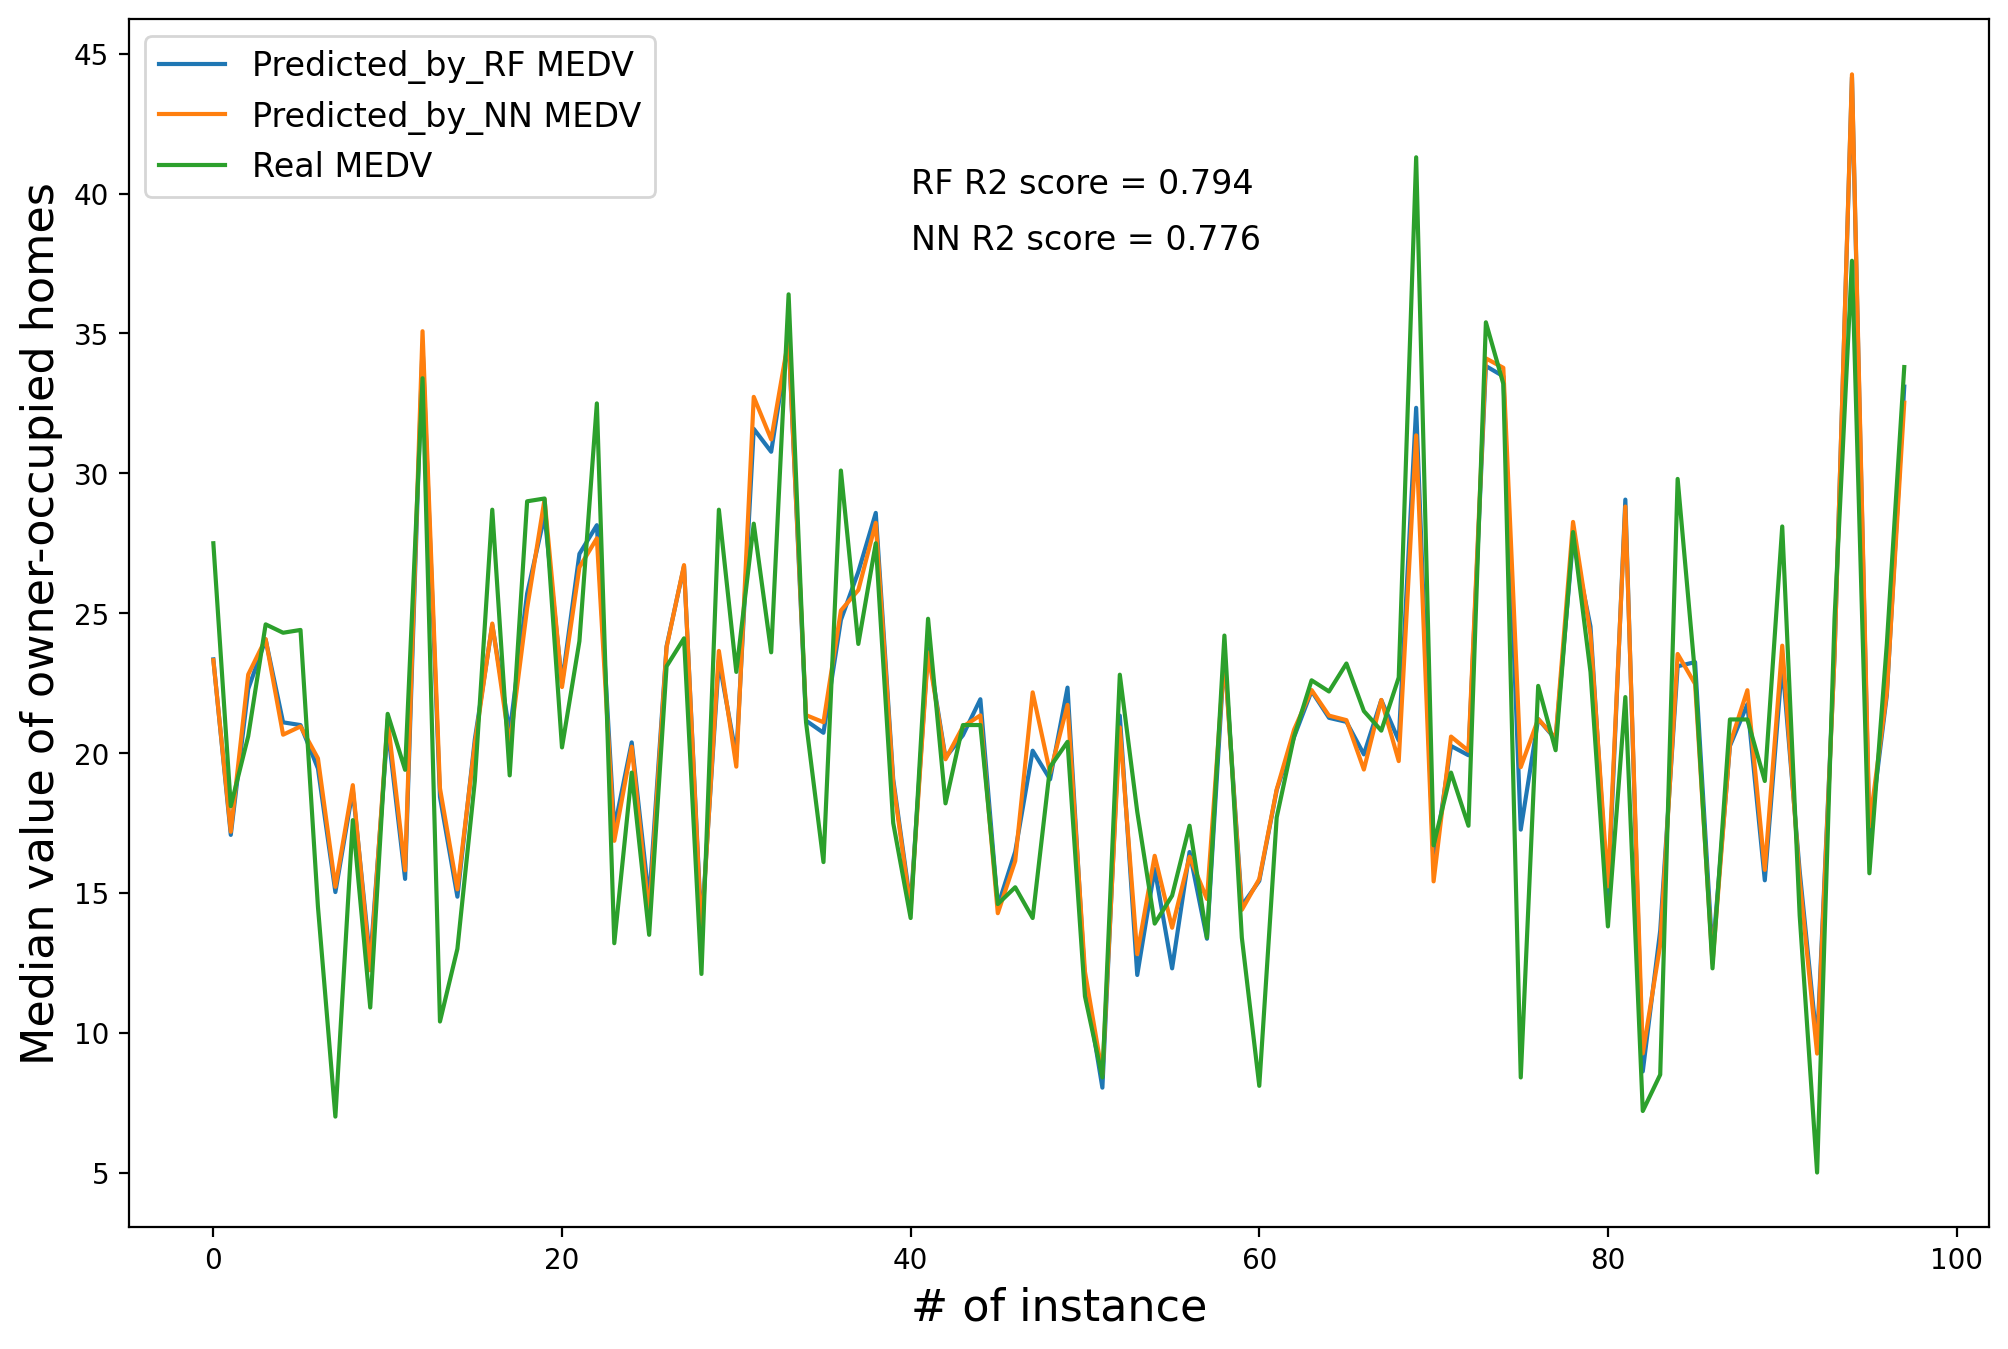

In [10]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.lineplot(x = np.arange(len(x_test)), y = y_pred)
sns.lineplot(x = np.arange(len(x_test)), y = y_pred_nn)
sns.lineplot(x = np.arange(len(x_test)), y = y_test)
plt.legend(labels =['Predicted_by_RF MEDV', 'Predicted_by_NN MEDV', 'Real MEDV'], fontsize = 12)
plt.xlabel('# of instance', fontsize = 16)
plt.ylabel('Median value of owner-occupied homes', fontsize = 16)
plt.text(40, 40, f'RF R2 score = {round(r2, 3)}', fontsize = 12) 
plt.text(40, 38, f'NN R2 score = {round(r2_nn, 3)}', fontsize = 12)
plt.show()